In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression


In [6]:
vaccine_threshold=30

data=pd.read_excel('felix_new.xlsx')
data.set_index('ID', inplace=True)
data['vaccine_bool']=np.where(data['vaccine_days']<= vaccine_threshold,0,1)

In [7]:
data

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool
ID,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52,1,1,HTN FL,4,30,2,14103.00,2,0
4087581,כץ נילי,79,2,0,DM,3,21,1,7.00,2,0
326256120,אשכנזי גיא,17,1,0,0,3,22,2,20484.00,2,0
14116495,דוקורקר רפאל,56,1,0,HTN,3,33,2,5473.00,2,1
340977537,לוקיניך אנדריי,36,1,0,0,4,16,1,45.00,2,0
24574626,שטרנברג אסף,51,1,0,HTN,7,39,2,266.00,2,1
14908727,שטאשוילי רפי,50,1,0,HCV HL,4,22,1,29.00,2,0
10701209,אלומות יעל,71,2,0,HTN HL,3,21,1,7.00,2,0
28492130,דנן רונית,49,2,0,0,3,42,2,2953.00,2,1


 HARA

In [9]:
control=pd.read_csv('vaccines new.csv')
control.columns=[col.replace('Reference Event-','') for col in control.columns]
control.columns=[col.replace('-Collection Date-Days from Reference','_duration') for col in control.columns]
control.columns=[col.replace('Numeric Result','fake result') for col in control.columns]
control.columns=[col.replace('Lab Test','test') for col in control.columns]
control.columns=[col.replace('-Non-numeric Result','_res') for col in control.columns]


con=control[['Patient ID','Age','Gender', 'antibody1_duration','antibody1_res']]
con.columns=['ID','age','gender','vaccine_days','antibody']
# con_data.antibody.describe()
con.dropna(inplace=True)
con.ID=[ids[-7:] for ids in con.ID]

con.antibody=[val.replace('non-reactive (negative) ','') for val in con.antibody]
con.antibody=[val.replace('reactive (positive) ','') for val in con.antibody]
con.antibody=[val.replace('^non-react.','') for val in con.antibody]
con.antibody=[val.replace('grayzone ','') for val in con.antibody]

con.set_index('ID', inplace=True)
con['SIM']=9
con['lab_type']=1
con.antibody=con.antibody.astype(float)
con['antibody_bool']=np.where(con['antibody']<= 0.98,0,1)



C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\577C~1\AppData\Local\Temp/ipykernel_18252/1514777490.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

CONTINUE

In [10]:
control=pd.read_csv('vaccines.csv')
control.columns=[col.replace('Reference Event-','') for col in control.columns]
control.columns=[col.replace('-Collection Date-Days from Reference','_duration') for col in control.columns]
control.columns=[col.replace('Numeric Result','fake result') for col in control.columns]
control.columns=[col.replace('Lab Test','test') for col in control.columns]
control.columns=[col.replace('-Non-numeric Result','_res') for col in control.columns]

control.columns

Index(['Patient ID', 'Age', 'Value Date', 'antibody1_duration',
       'antibody1-test', 'antibody1-fake result', 'antibody1_res',
       'antibody1-Approximate fake result', 'antibody2_duration',
       'antibody2-test', 'antibody2-fake result', 'antibody2_res',
       'antibody2-Approximate fake result', 'antibody3_duration',
       'antibody3-test', 'antibody3-fake result', 'antibody3_res',
       'antibody4_duration', 'antibody4-test', 'antibody4-fake result',
       'antibody5_duration', 'antibody5-test', 'antibody5-fake result'],
      dtype='object')

In [11]:
con=control[['Patient ID','Age', 'antibody1_duration','antibody1_res']]
con.columns=['ID','age','vaccine_days','antibody']
# con_data.antibody.describe()
con.dropna(inplace=True)
con.ID=[ids[-7:] for ids in con.ID]

con.antibody=[val.replace('non-reactive (negative) ','') for val in con.antibody]
con.antibody=[val.replace('reactive (positive) ','') for val in con.antibody]
con.antibody=[val.replace('^non-react.','') for val in con.antibody]
con.antibody=[val.replace('grayzone ','') for val in con.antibody]

con.set_index('ID', inplace=True)
con['SIM']=9
con['lab_type']=1
con.antibody=con.antibody.astype(float)
con['antibody_bool']=np.where(con['antibody']<= 0.98,0,1)

con.describe()




C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\577C~1\AppData\Local\Temp/ipykernel_18252/3699833621.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,age,vaccine_days,antibody,SIM,lab_type,antibody_bool
count,3306.000000,3306.000000,3306.000000,3306.0,3306.0,3306.000000
mean,49.959204,32.963278,26.239250,9.0,1.0,0.871748
std,13.762970,15.013333,17.571663,0.0,0.0,0.334420
min,7.186844,0.014387,0.020000,9.0,1.0,0.000000
25%,39.307092,27.947295,8.967500,9.0,1.0,1.000000
50%,49.507645,34.882726,28.670000,9.0,1.0,1.000000
75%,60.397799,37.005069,40.687500,9.0,1.0,1.000000
max,90.480994,166.843102,66.830000,9.0,1.0,1.000000


In [12]:
con.loc[con.antibody<1]

,age,vaccine_days,antibody,SIM,lab_type,antibody_bool
ID,,,,,,
E67E1F8,57.385791,24.126065,0.30,9,1,0
14CE2B0,55.875702,7.847500,0.03,9,1,0
0150F14,74.923702,21.975880,0.52,9,1,0
A8B8A65,58.641815,18.885370,0.78,9,1,0
2696009,25.793726,6.952824,0.03,9,1,0
...,...,...,...,...,...,...
C52A272,89.730282,37.438194,0.12,9,1,0
1C168EC,82.688338,166.843102,0.46,9,1,0
331CC52,42.143939,3.769410,0.04,9,1,0


## boolean antibodies

In [13]:
data=data[data.lab_type!=3]
data=data[data.lab_type!=4]

# data.dropna(inplace=True)
data.shape

(51, 11)

In [14]:
data

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool
ID,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52,1,1,HTN FL,4,30,2,14103.00,2,0
4087581,כץ נילי,79,2,0,DM,3,21,1,7.00,2,0
326256120,אשכנזי גיא,17,1,0,0,3,22,2,20484.00,2,0
14116495,דוקורקר רפאל,56,1,0,HTN,3,33,2,5473.00,2,1
340977537,לוקיניך אנדריי,36,1,0,0,4,16,1,45.00,2,0
24574626,שטרנברג אסף,51,1,0,HTN,7,39,2,266.00,2,1
14908727,שטאשוילי רפי,50,1,0,HCV HL,4,22,1,29.00,2,0
10701209,אלומות יעל,71,2,0,HTN HL,3,21,1,7.00,2,0
28492130,דנן רונית,49,2,0,0,3,42,2,2953.00,2,1


(array([ 1.,  8., 16., 11.,  3.,  7.,  2.,  2.,  0.,  1.]),
 array([ 0.85714286,  1.91428571,  2.97142857,  4.02857143,  5.08571429,
         6.14285714,  7.2       ,  8.25714286,  9.31428571, 10.37142857,
        11.42857143]),
 <BarContainer object of 10 artists>)

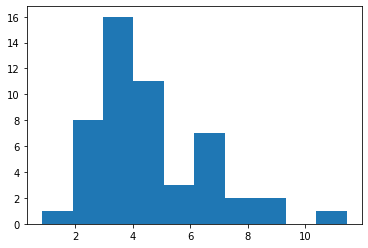

In [15]:
plt.hist(data.vaccine_days/7)

In [16]:

data=pd.concat([data,con])
data['age_50'] = np.where(data['age']<= 50,0,1)


In [17]:
low_thresh=28
high_thresh=42


mask_1=(data['vaccine_days']> low_thresh) & (data['vaccine_days']<high_thresh)
mask_0=(data['vaccine_days']<= low_thresh)
mask_2=(data['vaccine_days']>= high_thresh)

data.loc[mask_0, 'duration'] = 0
data.loc[mask_1, 'duration'] = 1
data.loc[mask_2, 'duration'] = 2

In [18]:
data[mask_2].shape

(462, 13)

In [19]:
rel_vars=['gender','age_50','SIM','vaccine_bool','arthiritis','metabolic']

In [20]:
38/(data.loc[data.arthiritis==0].shape[0])

0.95

In [21]:
for var in rel_vars:
    print (f'\n{var}\n')
    print (pd.crosstab(data[var] ,data.antibody_bool))


gender

antibody_bool  0  1   2
gender                 
1.0            0  0  33
2.0            1  1  16

age_50

antibody_bool    0     1   2
age_50                      
0              206  1485  24
1              219  1398  25

SIM

antibody_bool    0     1   2
SIM                         
1                0     0   9
2                0     0   6
3                1     0  14
4                0     0   8
7                0     1  12
9              424  2882   0

vaccine_bool

antibody_bool  0  1   2
vaccine_bool           
0.0            1  0  28
1.0            0  1  21

arthiritis

antibody_bool  0  1   2
arthiritis             
0.0            1  1  38
1.0            0  0  11

metabolic



KeyError: 'metabolic'

In [ ]:
for var in rel_vars:
    print (f'\n{var}\n')
    print (pd.crosstab(data[var] ,data.antibody_bool))

##  antibodies levels

In [22]:

data.shape

(3357, 13)

In [23]:
two_mean=data[data['lab_type']==2]['antibody'].mean()
two_std=data[data['lab_type']==2]['antibody'].std()
one_mean=data[data['lab_type']==1]['antibody'].mean()
one_std=data[data['lab_type']==1]['antibody'].std()
print (f'one mean is {one_mean} std in {one_std} two mean is {two_mean} std {two_std}')

one mean is 26.223305313719603 std in 17.64957179302166 two mean is 9312.86923076923 std 8711.474261261144


In [24]:
def std_ab(ab_level, mean,std):
    result=(ab_level-mean)/std
    return result

In [25]:
data['ab_std'] = np.where(data['lab_type']== 1,std_ab(data['antibody'], one_mean, one_std), std_ab(data['antibody'], two_mean, two_std))
data['SIM_agg']=np.where(np.isin(data.SIM, [1,2,4]),0,1)
data.loc[data.SIM == 9, 'SIM_agg'] = 2

data['gender']=data.gender-1


In [26]:
data

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool,age_50,duration,ab_std,SIM_agg
ID,,,,,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52.000000,0.0,1.0,HTN FL,4,30.000000,2,14103.00,2,0.0,1,1.0,0.549865,0
4087581,כץ נילי,79.000000,1.0,0.0,DM,3,21.000000,1,7.00,2,0.0,1,0.0,-1.089166,1
326256120,אשכנזי גיא,17.000000,0.0,0.0,0,3,22.000000,2,20484.00,2,0.0,0,0.0,1.282347,1
14116495,דוקורקר רפאל,56.000000,0.0,0.0,HTN,3,33.000000,2,5473.00,2,1.0,1,1.0,-0.440783,1
340977537,לוקיניך אנדריי,36.000000,0.0,0.0,0,4,16.000000,1,45.00,2,0.0,0,0.0,1.063861,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509096B,NaN,72.329795,NaN,NaN,NaN,9,35.907847,1,38.35,1,NaN,1,1.0,0.687082,2
2208BBE,NaN,61.079868,NaN,NaN,NaN,9,36.798588,1,1.63,1,NaN,1,1.0,-1.393422,2
C1D2CA5,NaN,57.490397,NaN,NaN,NaN,9,34.789248,1,45.82,1,NaN,1,1.0,1.110321,2


In [27]:
print(data.loc[data.gender=='Female']['ab_std'].mean())
print(data.loc[data.gender=='Make']['ab_std'].mean())
print(stats.ttest_ind(data.loc[data.gender=='Female']['ab_std'],data.loc[data.gender=='Make']['ab_std']))

nan
nan
Ttest_indResult(statistic=nan, pvalue=nan)


In [28]:
data17=data.loc[data.SIM_agg!=1]
data17.shape

(3329, 15)

In [29]:
data17[:30]

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool,age_50,duration,ab_std,SIM_agg
ID,,,,,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52.000000,0.0,1.0,HTN FL,4,30.000000,2,14103.00,2,0.0,1,1.0,0.549865,0
340977537,לוקיניך אנדריי,36.000000,0.0,0.0,0,4,16.000000,1,45.00,2,0.0,0,0.0,1.063861,0
14908727,שטאשוילי רפי,50.000000,0.0,0.0,HCV HL,4,22.000000,1,29.00,2,0.0,0,0.0,0.157324,0
64663701,אקהויז אברהם,65.000000,0.0,0.0,0,1,24.000000,2,5689.00,2,0.0,1,0.0,-0.415988,0
37341732,רייכרט רועי,40.000000,0.0,0.0,HTN HL,1,32.000000,2,12769.00,2,1.0,0,1.0,0.396733,0
7090277,מדי אילן,84.000000,1.0,1.0,DM HL,2,15.000000,2,40000.00,2,0.0,1,0.0,3.522611,0
24605883,עמית יפתח,51.000000,0.0,0.0,IBD,1,21.000000,1,14.00,2,0.0,1,0.0,-0.692555,0
38495552,דעבול חנה,44.000000,1.0,0.0,0,1,21.000000,1,21.00,2,0.0,0,0.0,-0.295945,0
54176615,אביב מאיר,63.000000,0.0,0.0,HTN,1,22.000000,2,19322.00,2,0.0,1,0.0,1.148959,0


In [30]:
pval=stats.ttest_ind(data17[data17['SIM_agg']==0]['ab_std'],data17[data17['SIM_agg']==2]['ab_std'])[1]
pval

0.02277397286588297

In [27]:
data

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool,age_50,duration,ab_std,SIM_agg
ID,,,,,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52.000000,0.0,1.0,HTN FL,4,30.000000,2,14103.00,2,0.0,1,1.0,0.549865,0
4087581,כץ נילי,79.000000,1.0,0.0,DM,3,21.000000,1,7.00,2,0.0,1,0.0,-1.089166,1
326256120,אשכנזי גיא,17.000000,0.0,0.0,0,3,22.000000,2,20484.00,2,0.0,0,0.0,1.282347,1
14116495,דוקורקר רפאל,56.000000,0.0,0.0,HTN,3,33.000000,2,5473.00,2,1.0,1,1.0,-0.440783,1
340977537,לוקיניך אנדריי,36.000000,0.0,0.0,0,4,16.000000,1,45.00,2,0.0,0,0.0,1.063861,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509096B,NaN,72.329795,NaN,NaN,NaN,9,35.907847,1,38.35,1,NaN,1,1.0,0.687082,2
2208BBE,NaN,61.079868,NaN,NaN,NaN,9,36.798588,1,1.63,1,NaN,1,1.0,-1.393422,2
C1D2CA5,NaN,57.490397,NaN,NaN,NaN,9,34.789248,1,45.82,1,NaN,1,1.0,1.110321,2


TTEST

In [28]:
data=data.loc[data.SIM!=9]
data.shape

(51, 15)

In [29]:
thresh=30


mask_1=(data['vaccine_days']> thresh)
mask_0=(data['vaccine_days']<= thresh)

data.loc[mask_0, 'duration'] = 0
data.loc[mask_1, 'duration'] = 1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
data['metabolic']=np.where(data.CM==0,0,1)

<ipython-input-30-d6eb7b33bd09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metabolic']=np.where(data.CM==0,0,1)


In [31]:
data

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool,age_50,duration,ab_std,SIM_agg,metabolic
ID,,,,,,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52.0,0.0,1.0,HTN FL,4,30.0,2,14103.00,2,0.0,1,0.0,0.549865,0,1
4087581,כץ נילי,79.0,1.0,0.0,DM,3,21.0,1,7.00,2,0.0,1,0.0,-1.089166,1,1
326256120,אשכנזי גיא,17.0,0.0,0.0,0,3,22.0,2,20484.00,2,0.0,0,0.0,1.282347,1,0
14116495,דוקורקר רפאל,56.0,0.0,0.0,HTN,3,33.0,2,5473.00,2,1.0,1,1.0,-0.440783,1,1
340977537,לוקיניך אנדריי,36.0,0.0,0.0,0,4,16.0,1,45.00,2,0.0,0,0.0,1.063861,0,0
24574626,שטרנברג אסף,51.0,0.0,0.0,HTN,7,39.0,2,266.00,2,1.0,1,1.0,-1.038500,1,1
14908727,שטאשוילי רפי,50.0,0.0,0.0,HCV HL,4,22.0,1,29.00,2,0.0,0,0.0,0.157324,0,1
10701209,אלומות יעל,71.0,1.0,0.0,HTN HL,3,21.0,1,7.00,2,0.0,1,0.0,-1.089166,1,1
28492130,דנן רונית,49.0,1.0,0.0,0,3,42.0,2,2953.00,2,1.0,0,1.0,-0.730057,1,0


In [32]:
ttest_vars=['gender','age_50','SIM_agg','arthiritis','metabolic']
pvals=[]

for strat in data.duration.unique():
    
    rel_data=data.loc[data.duration==strat]
   
    strat=strat.astype(str)
    
    for cat in ttest_vars: 
        print(f'strat: {strat}')
        pval=stats.ttest_ind(rel_data[rel_data[cat]==0]['ab_std'],rel_data[rel_data[cat]==1]['ab_std'])[1]
        print (f'{cat} : pval is {pval}')
        mean0=round(rel_data[rel_data[cat]==0]['ab_std'].mean(),2)
        std0=round(rel_data[rel_data[cat]==0]['ab_std'].std(),2)
        mean1=round(rel_data[rel_data[cat]==1]['ab_std'].mean(),2)
        std1=round(rel_data[rel_data[cat]==1]['ab_std'].std(),2)
        print (f'0mean:{mean0} 0std:{std0} 1mean:{mean1} 1std:{std1}')
        len0=len(rel_data[rel_data[cat]==0]['ab_std'])
        len1=len(rel_data[rel_data[cat]==1]['ab_std'])
        print (f'len0:{len0}\n len1:{len1}')
        pvals.append(pval.round(3))
        with open('results.txt', 'a') as out:
            out.write(f't-test for {cat} : pval is {pval}' + '\n')

    

strat: 0.0
gender : pval is 0.9403586890000151
0mean:-0.03 0std:0.84 1mean:-0.0 1std:1.46
len0:20
 len1:9
strat: 0.0
age_50 : pval is 0.5807669126757518
0mean:0.09 0std:0.84 1mean:-0.13 1std:1.22
len0:14
 len1:15
strat: 0.0
SIM_agg : pval is 0.020349638813644672
0mean:0.4 0std:1.16 1mean:-0.48 1std:0.68
len0:15
 len1:14
strat: 0.0
arthiritis : pval is 0.05618559472391258
0mean:-0.27 0std:0.78 1mean:0.52 1std:1.37
len0:20
 len1:9
strat: 0.0
metabolic : pval is 0.43309608933082433
0mean:-0.15 0std:0.75 1mean:0.16 1std:1.37
len0:17
 len1:12
strat: 1.0
gender : pval is 0.11074699766571448
0mean:0.33 0std:1.81 1mean:-0.73 1std:0.64
len0:13
 len1:9
strat: 1.0
age_50 : pval is 0.84354101535888
0mean:-0.03 0std:0.69 1mean:-0.17 1std:2.0
len0:10
 len1:12
strat: 1.0
SIM_agg : pval is 0.08985344662085024
0mean:0.62 0std:2.18 1mean:-0.52 1std:0.81
len0:8
 len1:14
strat: 1.0
arthiritis : pval is 0.688284413669747
0mean:-0.06 0std:1.59 1mean:-0.53 1std:0.23
len0:20
 len1:2
strat: 1.0
metabolic : pva

In [33]:

ttest_vars=['gender','age_50','SIM_agg','vaccine_bool','arthiritis','metabolic']
pvals=[]

for cat in ttest_vars: 
    
    pval=stats.ttest_ind(data[data[cat]==0]['ab_std'],data[data[cat]==1]['ab_std'])[1]
    print (f'{cat} : pval is {pval}')
    mean0=round(data[data[cat]==0]['ab_std'].mean(),2)
    std0=round(data[data[cat]==0]['ab_std'].std(),2)
    mean1=round(data[data[cat]==1]['ab_std'].mean(),2)
    std1=round(data[data[cat]==1]['ab_std'].std(),2)
    print (f'0mean:{mean0} 0std:{std0} 1mean:{mean1} 1std:{std1}')
    len0=len(data[data[cat]==0]['ab_std'])
    len1=len(data[data[cat]==1]['ab_std'])
    print (f'len0:{len0}\n len1:{len1}')
    pvals.append(pval.round(3))
    with open('results.txt', 'a') as out:
        out.write(f't-test for {cat} : pval is {pval}' + '\n')


# cdata=data[data['medication aggregated']!=1]
# pval=stats.ttest_ind(cdata[cdata['medication aggregated']==2]['ab_std'],cdata[cdata['medication aggregated']==3]['ab_std'])[1]
# print (f'dmard vs.  TNF : pval is {pval}')

gender : pval is 0.20117839189881123
0mean:0.11 0std:1.29 1mean:-0.37 1std:1.16
len0:33
 len1:18
age_50 : pval is 0.6060372667793298
0mean:0.04 0std:0.77 1mean:-0.15 1std:1.58
len0:24
 len1:27
SIM_agg : pval is 0.00459220326048453
0mean:0.48 0std:1.54 1mean:-0.5 1std:0.73
len0:23
 len1:28
vaccine_bool : pval is 0.8155753744063796
0mean:-0.02 0std:1.04 1mean:-0.11 1std:1.52
len0:29
 len1:22
arthiritis : pval is 0.2478135040552546
0mean:-0.17 0std:1.24 1mean:0.33 1std:1.3
len0:40
 len1:11
metabolic : pval is 0.49990119278432377
0mean:-0.18 0std:0.8 1mean:0.06 1std:1.61
len0:26
 len1:25


In [36]:
data.loc[data.gender==1].shape

(18, 15)

In [37]:
    pval=stats.ttest_ind(data[data[cat]==0]['ab_std'],data[data[cat]==1]['ab_std'])[1]


In [38]:
data[cat]

ID
23729361     0.0
4087581      0.0
326256120    0.0
14116495     1.0
340977537    0.0
24574626     1.0
14908727     0.0
10701209     0.0
28492130     1.0
22881098     0.0
27861517     0.0
57388803     0.0
322892985    1.0
64663701     0.0
37341732     1.0
7090277      0.0
321349540    1.0
53552584     1.0
24605883     0.0
38495552     0.0
54176615     0.0
42252403     1.0
57759425     0.0
55294177     1.0
27483569     0.0
305584245    0.0
53542981     1.0
24866865     0.0
306248261    1.0
14623755     0.0
31771314     0.0
55245708     1.0
34794263     0.0
40962888     0.0
32057291     0.0
213488885    1.0
25181561     0.0
851900       0.0
9986456      1.0
55448419     1.0
52586773     1.0
29486917     1.0
33569740     1.0
40302317     0.0
12272720     0.0
316320951    0.0
53656286     0.0
24847139     1.0
304088164    1.0
27240472     1.0
14959142     1.0
Name: vaccine_bool, dtype: float64

In [39]:
data.SIM.value_counts()

3    15
7    13
1     9
4     8
2     6
Name: SIM, dtype: int64

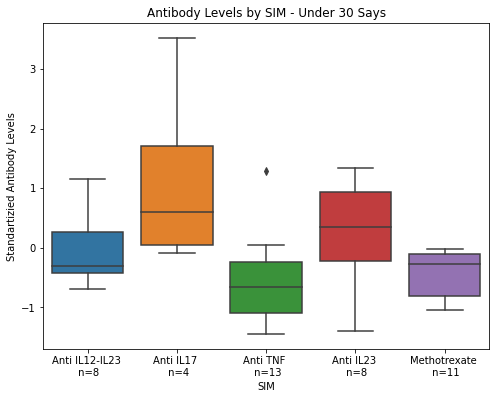

In [40]:
rel_data=data.loc[data.duration==0]

g=sns.boxplot(data=rel_data, x='SIM', y='ab_std')
g.set_xticklabels (['Anti IL12-IL23 \n n=8','Anti IL17 \n n=4','Anti TNF \n n=13','Anti IL23 \n n=8','Methotrexate \n n=11'])
g.set(xlabel='SIM', ylabel='Standartizied Antibody Levels',title='Antibody Levels by SIM - Under 30 Says')
# x1, x2 = 0, 2  
# y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "pval=0.12", ha='center', va='bottom', color=col)
g.figure.set_size_inches(8, 6)

plt.savefig("figures/Antibody Levels by SIM starta under 30.png")
plt.show()

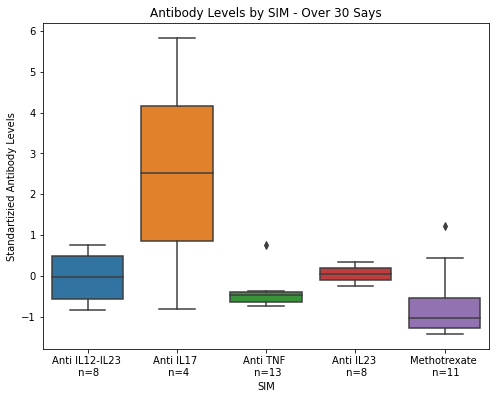

In [41]:
rel_data=data.loc[data.duration==1]

g=sns.boxplot(data=rel_data, x='SIM', y='ab_std')
g.set_xticklabels (['Anti IL12-IL23 \n n=8','Anti IL17 \n n=4','Anti TNF \n n=13','Anti IL23 \n n=8','Methotrexate \n n=11'])
g.set(xlabel='SIM', ylabel='Standartizied Antibody Levels',title='Antibody Levels by SIM - Over 30 Says')
# x1, x2 = 0, 2  
# y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "pval=0.12", ha='center', va='bottom', color=col)
g.figure.set_size_inches(8, 6)

plt.savefig("figures/Antibody Levels by SIM starta Over 30.png")
plt.show()


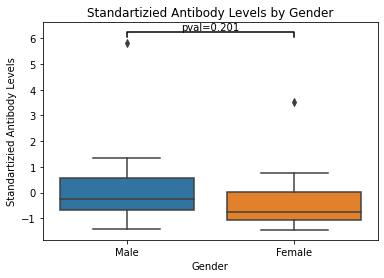

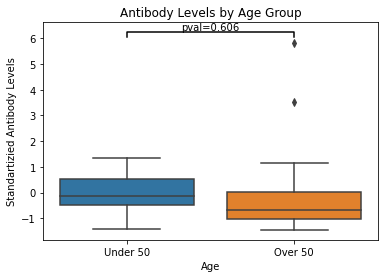

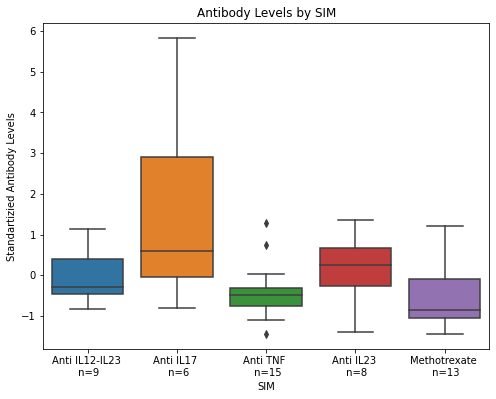

In [64]:
g=sns.boxplot(data=data, x='gender', y='ab_std')
g.set_xticklabels (['Male','Female'])
g.set(xlabel='Gender', ylabel='Standartizied Antibody Levels',title='Standartizied Antibody Levels by Gender')
x1, x2 = 0, 1  
y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"pval={pvals[0]}", ha='center', va='bottom', color=col)
plt.savefig("figures/Antibody Levels by Gende.png")
plt.show()


g=sns.boxplot(data=data, x='age_50', y='ab_std')
g.set_xticklabels (['Under 50','Over 50'])
g.set(xlabel='Age', ylabel='Standartizied Antibody Levels',title='Antibody Levels by Age Group')
x1, x2 = 0, 1  
y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h,  f"pval={pvals[1]}", ha='center', va='bottom', color=col)
plt.savefig("figures/Antibody Levels by Age.png")
plt.show()

g=sns.boxplot(data=data, x='SIM', y='ab_std')
g.set_xticklabels (['Anti IL12-IL23 \n n=9','Anti IL17 \n n=6','Anti TNF \n n=15','Anti IL23 \n n=8','Methotrexate \n n=13'])
g.set(xlabel='SIM', ylabel='Standartizied Antibody Levels',title='Antibody Levels by SIM')
# x1, x2 = 0, 2  
# y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "pval=0.12", ha='center', va='bottom', color=col)
g.figure.set_size_inches(8, 6)

plt.savefig("figures/Antibody Levels by SIM.png")
plt.show()

# g=sns.boxplot(data=data[data['medication aggregated']!=1], x='medication aggregated', y='ab_std')
# g.set_xticklabels (['Anti TNF','Methotrexate'])
# g.set(xlabel='SIM', ylabel='Standartizied Antibody levels',title='Antibody Levels by SIM')
# x1, x2 = 0, 1  
# y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "pval=0.87", ha='center', va='bottom', color=col)
# plt.savefig("figures/Antibody Levels by DMARDs vs. TNF.png")
# plt.show()


# g=sns.boxplot(data=data, x='SIM_agg', y='ab_std')
# g.set_xticklabels (['Anti IL17/Anti IL23','Anti TNF/Methotrexate','Controls'])
# g.set(xlabel='SIM', ylabel='Standartizied Antibody levels',title='Antibody Levels by SIM')
# x1, x2 = 0, 1  
# y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
# # plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# # plt.text((x1+x2)*.5, y+h,  f"pval={pvals[2]}", ha='center', va='bottom', color=col)
# plt.savefig("figures/Antibody Levels by 17-23 vs. DMARDS and TNF.png")
# plt.show()

# g=sns.boxplot(data=data17, x='SIM_agg', y='ab_std')
# g.set_xticklabels (['Anti IL17/Anti IL23','Controls'])
# g.set(xlabel='SIM', ylabel='Standartizied Antibody levels',title='Antibody Levels by SIM')
# x1, x2 = 0, 1  
# y, h, col = data['ab_std'].max() + 0.2, 0.2, 'k'
# # plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# # plt.text((x1+x2)*.5, y+h,  f"pval={pvals[2]}", ha='center', va='bottom', color=col)
# plt.savefig("figures/Antibody Levels by 17-23 vs. DMARDS and TNF.png")
# plt.show()

ANOVA

ALL MEDS BY STARTA

In [35]:
anova_cats='SIM'

for strat in data.duration.unique():
    
    rel_data=data.loc[data.duration==strat]
   
    strat=strat.astype(str)


    anova_res=stats.f_oneway(rel_data[rel_data[anova_cats]==1]['ab_std'], rel_data[rel_data[anova_cats]==2]['ab_std'], rel_data[rel_data[anova_cats]==3]['ab_std'],rel_data[rel_data[anova_cats]==4]['ab_std'],rel_data[rel_data[anova_cats]==7]['ab_std'])
    len1=len(rel_data[rel_data[anova_cats]==1]['ab_std'])
    mean1=round(rel_data[rel_data[anova_cats]==1]['ab_std'].mean(),2)
    std1=round(rel_data[rel_data[anova_cats]==1]['ab_std'].std(),2)
    
    
    len2=len(rel_data[rel_data[anova_cats]==2]['ab_std'])
    mean2=round(rel_data[rel_data[anova_cats]==2]['ab_std'].mean(),2)
    std2=round(rel_data[rel_data[anova_cats]==2]['ab_std'].std(),2)
    
    len3=len(rel_data[rel_data[anova_cats]==3]['ab_std'])
    mean3=round(rel_data[rel_data[anova_cats]==3]['ab_std'].mean(),2)
    std3=round(rel_data[rel_data[anova_cats]==3]['ab_std'].std(),2)
    
    len4=len(rel_data[rel_data[anova_cats]==4]['ab_std'])
    mean4=round(rel_data[rel_data[anova_cats]==4]['ab_std'].mean(),2)
    std4=round(rel_data[rel_data[anova_cats]==4]['ab_std'].std(),2)
    
    len7=len(rel_data[rel_data[anova_cats]==7]['ab_std'])
    mean7=round(rel_data[rel_data[anova_cats]==7]['ab_std'].mean(),2)
    std7=round(rel_data[rel_data[anova_cats]==7]['ab_std'].std(),2)

    
    print (strat)

    print(f'12.23:{len1}')
    print (f'mean:{mean1} \n std:{std1}')
    print(f'lenIL17:{len2}')
    print (f'mean:{mean2} \n std:{std2}')
    
    print(f'TNF:{len3}')
    print (f'mean:{mean3} \n std:{std3}')

    print(f'IL23:{len4}')
    print (f'mean:{mean4} \n std:{std4}')

    print(f'MTX:{len7}')
    print (f'mean:{mean7} \n std:{std7}')
    
    mean0=round(data[data[cat]==0]['ab_std'].mean(),2)
    std0=round(data[data[cat]==0]['ab_std'].std(),2)
    
    
    print ('anova for all meds')
    print(anova_res)



0.0
12.23:5
mean:0.0 
 std:0.73
lenIL17:4
mean:1.16 
 std:1.66
TNF:9
mean:-0.49 
 std:0.81
IL23:6
mean:0.23 
 std:1.0
MTX:5
mean:-0.45 
 std:0.46
anova for all meds
F_onewayResult(statistic=2.471788310568638, pvalue=0.07168735625442745)
1.0
12.23:4
mean:-0.04 
 std:0.74
lenIL17:2
mean:2.51 
 std:4.7
TNF:6
mean:-0.33 
 std:0.55
IL23:2
mean:0.04 
 std:0.4
MTX:8
mean:-0.67 
 std:0.97
anova for all meds
F_onewayResult(statistic=2.20826499326476, pvalue=0.11145433295115839)


In [43]:
med_dic={1:'IL12,23',2:'IL17',3:'TNF',4:'IL23',7:'MTX' }

'IL12,23'

ALL MEDS COMBIBED

In [37]:
anova_res=stats.f_oneway(rel_data[rel_data[anova_cats]==1]['ab_std'], rel_data[rel_data[anova_cats]==2]['ab_std'], rel_data[rel_data[anova_cats]==3]['ab_std'],rel_data[rel_data[anova_cats]==4]['ab_std'],rel_data[rel_data[anova_cats]==7]['ab_std'])
 
rel_data=data
    
len1=len(rel_data[rel_data[anova_cats]==1]['ab_std'])
mean1=round(rel_data[rel_data[anova_cats]==1]['ab_std'].mean(),2)
std1=round(rel_data[rel_data[anova_cats]==1]['ab_std'].std(),2)
    
    
len2=len(rel_data[rel_data[anova_cats]==2]['ab_std'])
mean2=round(rel_data[rel_data[anova_cats]==2]['ab_std'].mean(),2)
std2=round(rel_data[rel_data[anova_cats]==2]['ab_std'].std(),2)
    
len3=len(rel_data[rel_data[anova_cats]==3]['ab_std'])
mean3=round(rel_data[rel_data[anova_cats]==3]['ab_std'].mean(),2)
std3=round(rel_data[rel_data[anova_cats]==3]['ab_std'].std(),2)
    
len4=len(rel_data[rel_data[anova_cats]==4]['ab_std'])
mean4=round(rel_data[rel_data[anova_cats]==4]['ab_std'].mean(),2)
std4=round(rel_data[rel_data[anova_cats]==4]['ab_std'].std(),2)
    
len7=len(rel_data[rel_data[anova_cats]==7]['ab_std'])
mean7=round(rel_data[rel_data[anova_cats]==7]['ab_std'].mean(),2)
std7=round(rel_data[rel_data[anova_cats]==7]['ab_std'].std(),2)

print(f'12.23:{len1}')
print (f'mean:{mean1} \n std:{std1}')
print(f'lenIL17:{len2}')
print (f'mean:{mean2} \n std:{std2}')
    
print(f'TNF:{len3}')
print (f'mean:{mean3} \n std:{std3}')

print(f'IL23:{len4}')
print (f'mean:{mean4} \n std:{std4}')

print(f'MTX:{len7}')
print (f'mean:{mean7} \n std:{std7}')
    
mean0=round(data[data[cat]==0]['ab_std'].mean(),2)
std0=round(data[data[cat]==0]['ab_std'].std(),2)
    
    
print ('anova for all meds')
print(anova_res)


12.23:9
mean:-0.01 
 std:0.69
lenIL17:6
mean:1.61 
 std:2.56
TNF:15
mean:-0.43 
 std:0.7
IL23:8
mean:0.18 
 std:0.87
MTX:13
mean:-0.58 
 std:0.79
anova for all meds
F_onewayResult(statistic=2.20826499326476, pvalue=0.11145433295115839)


1 VS ALL

In [50]:
for med in data.SIM.unique():
    a=data.loc[data.SIM==med].ab_std
    b=data.loc[data.SIM!=med].ab_std
    pval=stats.ttest_ind(a,b)[1]
    print (med_dic[med])
    print (f'{med_dic[med]} mean: {a.mean()}')
    print (f'all others mean: {b.mean()}')
    print (f'pval:{pval}')

IL23
IL23 mean: 0.18188639888484662
all others mean: -0.10329569966232856
pval:0.5608401454983213
TNF
TNF mean: -0.4263507996404737
all others mean: 0.09468439167238188
pval:0.17980257200311925
MTX
MTX mean: -0.5829480512310266
all others mean: 0.12083423083163124
pval:0.08115906472671615
IL12,23
IL12,23 mean: -0.014262562321772747
all others mean: -0.0680538293691763
pval:0.9086024376817957
IL17
IL17 mean: 1.610039106004379
all others mean: -0.28104130067616956
pval:0.00026477609482029966


In [306]:
    mean1=round(rel_data[rel_data[anova_cats]==1]['ab_std'].mean(),2)
mean1

-0.04

In [285]:
anova_cats='SIM'
anova_res=stats.f_oneway(data[data[anova_cats]==1]['ab_std'], data[data[anova_cats]==2]['ab_std'], data[data[anova_cats]==3]['ab_std'],data[data[anova_cats]==4]['ab_std'],data[data[anova_cats]==7]['ab_std'],data[data[anova_cats]==9]['ab_std'])
print ('anova for all meds')
print(anova_res)

with open('results.txt', 'a') as out:
        out.write(f'ANOVA results for all drugs :  {anova_res}' + '\n')

anova_cats='SIM_agg'
anova_res=stats.f_oneway(data[data[anova_cats]==1]['ab_std'], data[data[anova_cats]==2]['ab_std'], data[data[anova_cats]==0]['ab_std'])
print ('anova for all SIM_agg')
print(anova_res)

with open('results.txt', 'a') as out:
        out.write(f'ANOVA results for all drugs :  {anova_res}' + '\n')

anova for all meds
F_onewayResult(statistic=nan, pvalue=nan)
anova for all SIM_agg
F_onewayResult(statistic=nan, pvalue=nan)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [110]:
fcon=data.loc[data.SIM==9]
fcon.shape

(3306, 12)

In [111]:
fcon.describe()

,age,gender,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool,age_50,ab_std,SIM_agg
count,3306.000000,0.0,3306.0,3306.000000,3306.0,3306.000000,3306.000000,0.0,3306.000000,3306.000000,3306.0
mean,49.959204,NaN,9.0,32.963278,1.0,26.239250,0.871748,NaN,0.488506,0.003179,2.0
std,13.762970,NaN,0.0,15.013333,0.0,17.571663,0.334420,NaN,0.499943,1.000757,0.0
min,7.186844,NaN,9.0,0.014387,1.0,0.020000,0.000000,NaN,0.000000,-1.490083,2.0
25%,39.307092,NaN,9.0,27.947295,1.0,8.967500,1.000000,NaN,0.000000,-0.980497,2.0
50%,49.507645,NaN,9.0,34.882726,1.0,28.670000,1.000000,NaN,0.000000,0.141617,2.0
75%,60.397799,NaN,9.0,37.005069,1.0,40.687500,1.000000,NaN,1.000000,0.826049,2.0
max,90.480994,NaN,9.0,166.843102,1.0,66.830000,1.000000,NaN,1.000000,2.314939,2.0


SPERAMAN

In [66]:
spearman_vats=['age','vaccine_days']
for  cat in spearman_vats:
    rho, pval = stats.spearmanr(data[cat], data['ab_std'])
    print (f'{cat} : pval is {pval} , rho is {rho}    ')
    with open('results.txt', 'a') as out:
        out.write(f'{cat} : SPEARMAN pval is {pval} , rho is {rho}    ' + '\n')
    

age : pval is 3.7964902061033555e-28 , rho is -0.1883438038579043    
vaccine_days : pval is nan , rho is nan    


In [67]:
spearman_vats=['age','vaccine_days']
for  cat in spearman_vats:
    rho, pval = stats.pearsonr(data[cat], data['ab_std'])
    print (f'{cat} : PEARSON pval is {pval} , rho is {rho}    ')
    with open('results.txt', 'a') as out:
        out.write(f'{cat} : PEARSON pval is {pval} , rho is {rho}    ' + '\n')
    

age : PEARSON pval is 2.349602809177462e-29 , rho is -0.19251341088151916    


ValueError: array must not contain infs or NaNs

In [ ]:
plt.scatter(data.age, data['ab_std'])
plt.title('age vs ab')
plt.show()

plt.scatter(data['days from vaccine'], data['ab_std'])
plt.title('dats from vaccine vs ab')
plt.show()

plt.scatter(data['days from vaccine'], data['age'])
plt.title('dats from vaccine vs age')
plt.show()

LINEAR REGRESSION - REGULAR

In [313]:
import statsmodels.api as sm


In [320]:
data['metabolic']=np.where(data.CM==0,0,1)

<ipython-input-320-d6eb7b33bd09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metabolic']=np.where(data.CM==0,0,1)


In [321]:
data

,name,age,gender,arthiritis,CM,SIM,vaccine_days,lab_type,antibody,antibody_bool,vaccine_bool,age_50,duration,ab_std,SIM_agg,metabolic
ID,,,,,,,,,,,,,,,,
23729361,סנדרוביץ ליאור,52.0,0.0,1.0,HTN FL,4,30.0,2,14103.00,2,0.0,1,0.0,0.549865,0,1
4087581,כץ נילי,79.0,1.0,0.0,DM,3,21.0,1,7.00,2,0.0,1,0.0,-1.089166,1,1
326256120,אשכנזי גיא,17.0,0.0,0.0,0,3,22.0,2,20484.00,2,0.0,0,0.0,1.282347,1,0
14116495,דוקורקר רפאל,56.0,0.0,0.0,HTN,3,33.0,2,5473.00,2,1.0,1,1.0,-0.440783,1,1
340977537,לוקיניך אנדריי,36.0,0.0,0.0,0,4,16.0,1,45.00,2,0.0,0,0.0,1.063861,0,0
24574626,שטרנברג אסף,51.0,0.0,0.0,HTN,7,39.0,2,266.00,2,1.0,1,1.0,-1.038500,1,1
14908727,שטאשוילי רפי,50.0,0.0,0.0,HCV HL,4,22.0,1,29.00,2,0.0,0,0.0,0.157324,0,1
10701209,אלומות יעל,71.0,1.0,0.0,HTN HL,3,21.0,1,7.00,2,0.0,1,0.0,-1.089166,1,1
28492130,דנן רונית,49.0,1.0,0.0,0,3,42.0,2,2953.00,2,1.0,0,1.0,-0.730057,1,0


In [335]:
X=pd.DataFrame()
X=data[['age','gender','vaccine_days','SIM_agg','arthiritis','metabolic']]
X = sm.add_constant(X)
y=data['ab_std']

mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ab_std   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.046
Date:                Wed, 11 Aug 2021   Prob (F-statistic):             0.0795
Time:                        15:39:35   Log-Likelihood:                -77.230
No. Observations:                  51   AIC:                             168.5
Df Residuals:                      44   BIC:                             182.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7197      0.789      0.913   

In [336]:
results_summary = res.summary()

results_as_html = results_summary.tables[1].as_html()
final=pd.read_html(results_as_html, header=0, index_col=0)[0]
final.to_csv('linear_regression_continous.csv')

LR - AGE CAT

In [19]:
X=pd.DataFrame()
X[['gender','medication dmatds','age_cat']]=data[['gender','medication dmatds','age 50']]-1
X[['days from vaccine']]=data[['days from vaccine']]
X = sm.add_constant(X)
y=data['ab_std']

mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ab_std   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     6.814
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           0.000279
Time:                        11:00:51   Log-Likelihood:                -51.137
No. Observations:                  45   AIC:                             112.3
Df Residuals:                      40   BIC:                             121.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0864      0.29

In [20]:
results_summary = res.summary()

results_as_html = results_summary.tables[1].as_html()
final=pd.read_html(results_as_html, header=0, index_col=0)[0]
final.to_csv('linear_regression_age_cat.csv')

LR - DAYS CAT

In [21]:
cut_off=10
data['days_cst'] = np.where(data['days from vaccine']<cut_off , 0, 1)

In [22]:
X=pd.DataFrame()
X[['gender','medication dmatds']]=data[['gender','medication dmatds']]-1
X[['days from vaccine','days_cst']]=data[['days from vaccine','days_cst']]
X = sm.add_constant(X)
y=data['ab_std']

mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ab_std   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     5.116
Date:                Sun, 18 Apr 2021   Prob (F-statistic):            0.00200
Time:                        11:01:03   Log-Likelihood:                -53.532
No. Observations:                  45   AIC:                             117.1
Df Residuals:                      40   BIC:                             126.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0698      0.84

In [23]:
results_summary = res.summary()

results_as_html = results_summary.tables[1].as_html()
final=pd.read_html(results_as_html, header=0, index_col=0)[0]
final.to_csv('linear_regression_days_from_cat.csv')